# Importation des modeles avec scikit-learn

In [163]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import(accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score)

import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 42


df = pd.read_csv('../data/health_lifestyle_dataset.csv')


In [120]:
df.head()

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0


In [121]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null  int64  
dtypes: 

,id,age,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,48.525990,29.024790,10479.87029,6.491784,2.751496,2603.341200,0.200940,0.300020,74.457420,134.58063,89.508850,224.300630,0.299150,0.248210
std,28867.657797,17.886768,6.352666,5483.63236,2.021922,1.297338,807.288563,0.400705,0.458269,14.423715,25.95153,17.347041,43.327749,0.457888,0.431976
min,1.000000,18.000000,18.000000,1000.00000,3.000000,0.500000,1200.000000,0.000000,0.000000,50.000000,90.00000,60.000000,150.000000,0.000000,0.000000
25%,25000.750000,33.000000,23.500000,5729.00000,4.700000,1.600000,1906.000000,0.000000,0.000000,62.000000,112.00000,74.000000,187.000000,0.000000,0.000000
50%,50000.500000,48.000000,29.000000,10468.00000,6.500000,2.800000,2603.000000,0.000000,0.000000,74.000000,135.00000,89.000000,224.000000,0.000000,0.000000
75%,75000.250000,64.000000,34.500000,15229.00000,8.200000,3.900000,3299.000000,0.000000,1.000000,87.000000,157.00000,105.000000,262.000000,1.000000,0.000000
max,100000.000000,79.000000,40.000000,19999.00000,10.000000,5.000000,3999.000000,1.000000,1.000000,99.000000,179.00000,119.000000,299.000000,1.000000,1.000000


# Classification

On cherche à prédire s'il y a un risque de maladie (colonne ```disease_risk```).

In [122]:
TARGET ='disease_risk'  

X = df.drop(columns=[TARGET])
y = df[TARGET]

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

print("Variables numériques :", numeric_features.tolist())
print("Variables catégorielles :", categorical_features.tolist())



Variables numériques : ['id', 'age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history']
Variables catégorielles : ['gender']


In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y if y.nunique() < 20 else None
)


In [164]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate_init=1e-3,
    max_iter=300,
    early_stopping=True,
    random_state=RANDOM_STATE
)

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("mlp", mlp)
])


In [125]:
pipeline.fit(X_train, y_train)

print("Nombre d'itérations :", pipeline.named_steps["mlp"].n_iter_)

y_pred = pipeline.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Nombre d'itérations : 12
Accuracy : 0.7518
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     15036
           1       0.00      0.00      0.00      4964

    accuracy                           0.75     20000
   macro avg       0.38      0.50      0.43     20000
weighted avg       0.57      0.75      0.65     20000



c:\Users\ronyl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ronyl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ronyl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [126]:
y_pred = pipeline.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy : 0.7518
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     15036
           1       0.00      0.00      0.00      4964

    accuracy                           0.75     20000
   macro avg       0.38      0.50      0.43     20000
weighted avg       0.57      0.75      0.65     20000



c:\Users\ronyl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ronyl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ronyl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Matrice de confusion

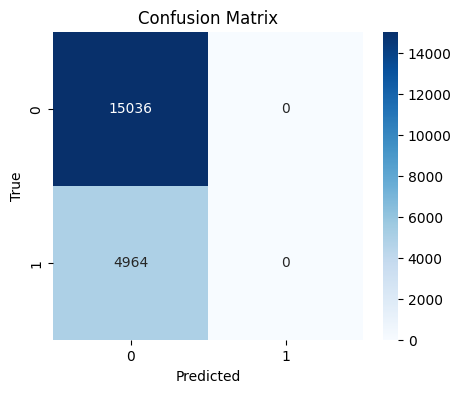

In [170]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Optimisation (GridSearch)

In [128]:
param_grid = {
    "mlp__hidden_layer_sizes": [(64,), (64, 32), (128, 64)],
    "mlp__alpha": [1e-5, 1e-4, 1e-3],
    "mlp__learning_rate_init": [1e-4, 1e-3]
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur score CV :", grid.best_score_)


Meilleurs paramètres : {'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (64,), 'mlp__learning_rate_init': 0.0001}
Meilleur score CV : 0.00020133383985586657


In [129]:
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)

print("Accuracy (optimisé) :", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Accuracy (optimisé) : 0.75105
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     15036
           1       0.11      0.00      0.00      4964

    accuracy                           0.75     20000
   macro avg       0.43      0.50      0.43     20000
weighted avg       0.59      0.75      0.65     20000



# Régression Linéaire

On cherche à prédire le taux de cholesterol et les calories consomées (les colonnes ```cholesterol``` et ```calories_consumed```).

In [168]:
TARGETS = ["calories_consumed", "cholesterol"] 

X = df.drop(columns=TARGETS)
Y = df[TARGETS]


In [171]:
print(df.columns.tolist())


['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'family_history', 'disease_risk']


Numériques : ['id', 'age', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'family_history', 'disease_risk']
Catégorielles : ['gender']


In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=RANDOM_STATE
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), X.select_dtypes(include=["int64", "float64"]).columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), X.select_dtypes(include=["object"]).columns)
    ]
)

In [178]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate_init=1e-3,
    max_iter=500,
    early_stopping=True,
    random_state=RANDOM_STATE
)
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("mlp", mlp)
])

In [179]:
pipeline.fit(X_train, Y_train)
print("Itérations :", pipeline.named_steps["mlp"].n_iter_)

Itérations : 59


In [180]:
Y_pred = pipeline.predict(X_test)

In [181]:
for i, target in enumerate(TARGETS):
    mse = mean_squared_error(Y_test.iloc[:, i], Y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test.iloc[:, i], Y_pred[:, i])

    print(f" {target}")
    print(f"  MSE  : {mse:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  R²   : {r2:.4f}")
    print()


 calories_consumed
  MSE  : 659784.6782
  RMSE : 812.2713
  R²   : -0.0049

 cholesterol
  MSE  : 1894.0053
  RMSE : 43.5202
  R²   : -0.0087



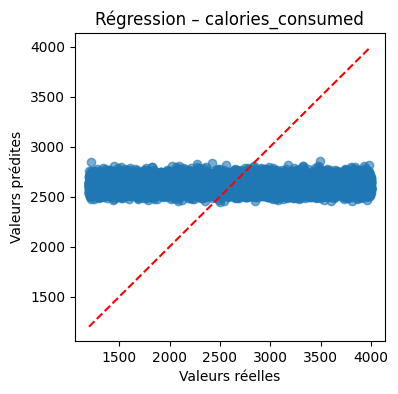

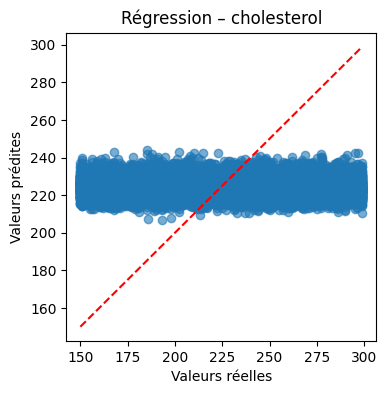

In [184]:
for i, target in enumerate(TARGETS):
    plt.figure(figsize=(4, 4))
    plt.scatter(Y_test.iloc[:, i], Y_pred[:, i], alpha=0.6)
    plt.plot(
        [Y_test.iloc[:, i].min(), Y_test.iloc[:, i].max()],
        [Y_test.iloc[:, i].min(), Y_test.iloc[:, i].max()],
        "r--"
    )
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.title(f"Régression – {target}")
    plt.show()
